In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('marketing.csv', delimiter=';')
df.drop(df.columns[[0]], axis=1, inplace=True) # удаление столбца "Отметка времени"

**Вопросы, на которые отвечали респонденты**

In [27]:
questions = list(df.columns)
print(*df.columns, sep='\n')

1. На каком курсе бакалавриата вы обучаетесь?
2. Выберите ваше направление обучения:
3. Принимали ли вы участие в студенческих олимпиадах по экономике и другим направлениям? 
4. Планируете ли вы принимать участие  в студенческих олимпиадах по экономике и другим направлениям?
5. Расскажите, почему вы не участвовали и не планируете участвовать в студенческих олимпиадах? Укажите главную причину, пожалуйста.
6. Если есть вторая по важности причина, укажите её, пожалуйста. Ответ на предыдущий вопрос выбирать не следует (кроме варианта "Я участвовал(а) / хочу участвовать в олимпиадах").
7. Почему, прежде всего, вы хотите участвовать в олимпиадах? 
8. Одни студенты заботятся главным образом об учёбе и стараются не отвлекаться на работу. Другие заботятся главным образом о работе, стремятся уже в вузе начать успешную карьеру. С позицией каких студентов вы согласны в большей степени? 
9. В каком направлении вы бы хотели развиваться в будущем (строить карьеру и/или продолжать обучение в магистрат

In [28]:
df.rename(columns = {df.columns[0] : 'year',
                    df.columns[1] : 'major',
                    df.columns[2] : 'if_participated',
                    df.columns[3] : 'if_plan',
                    df.columns[4] : 'why_not_1',
                    df.columns[5] : 'why_not_2',
                    df.columns[6] : 'why_want',
                    df.columns[7] : 'study_career',
                    df.columns[8] : 'future_course',
                    df.columns[9] : 'future_area',
                    df.columns[10] : 'tasks_type_1',
                    df.columns[11] : 'tasks_type_2',
                    df.columns[12] : 'online_offline',
                    df.columns[13] : 'bonuses'}, inplace=True)

In [29]:
df.insert(0, 0, list(np.arange(df.shape[0])))

In [30]:
# функция, которая группирует ответы в категорию "Другое", если доля каждого из них менее 4%
def get_other(x):
    y = pd.DataFrame(df.groupby(f'{x}').count()[0])
    y.loc['Другое'] = list(np.arange(y.shape[1]))
    for i in list(y.index):
        if y.loc[i][0] / y[0].sum() <= 0.04:
            y.loc['Другое', 0] += y.loc[i][0]
            y.drop(labels=i, axis=0, inplace=True)
    return y

In [31]:
# функция, которая показывает ответы из категории "Другое"
def get_other_q(x):
    y = pd.DataFrame(df.groupby(f'{x}').count()[0])
    lst = []
    for i in list(y.index):
        if y.loc[i][0] / y[0].sum() <= 0.02:
            lst.append(i)
    return lst  

In [32]:
# функция, которая позволяет получить исходный вопрос и отформатировать его для диаграммы
def get_question(x):
    ind = df.columns.get_loc(f'{x}')
    q = questions[ind-1]
    i = 1
    while q[i-1].isdigit() == True:
        q = q[i+1:]
        i += 1
    q = q.lstrip('. ')
    if 45 < len(q) <= 150:
        lst = q.split()
        mid = len(lst) // 2
        lst.insert(mid+1, '\n')
        q = ' '.join(lst)
    if len(q) > 150:
        lst = q.split()
        third1 = len(lst) // 3
        third2 = 2 * third1
        lst.insert(third1+1, '\n')
        lst.insert(third2+1, '\n')
        q = ' '.join(lst)
    return q

In [33]:
# построение графиков
def get_pie(x):    
    y = get_other(x)
    labels = [f'{n} ({v/sum(y[0]):.1%})' for n, v in zip(list(y.index), list(y[0]))]
    fig, ax = plt.subplots(1, 1)
    ax.pie(y[0])
    ax.set_title(get_question(x))
    ax.legend(y.index, bbox_to_anchor=(1, 0.6), labels=labels)
    fig.savefig(f'{x}.pdf', bbox_inches='tight')
    plt.show()
    if len(get_other_q(x)) != 0:
        print('Другое:')
        print(*get_other_q(x), sep='\n')

**Визуализация ответов на вопросы**

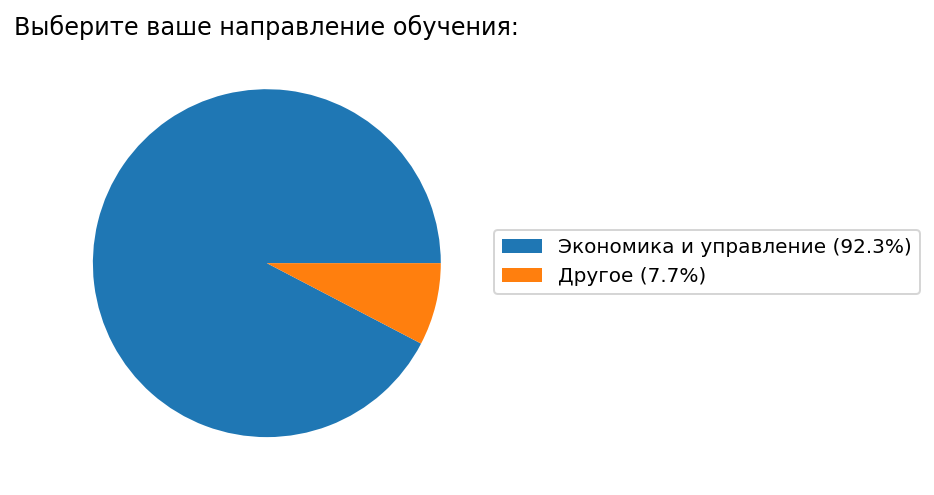

Другое:
Ветеринария и зоотехния
Изобразительное и прикладные виды искусств
Информационная безопасность
Культуроведение и социокультурные проекты
Образование и педагогические науки
Политические науки и регионоведение
Психологические науки
Средства массовой информации и информационно-библиотечное дело
Технологии легкой промышленности
Юриспруденция


In [34]:
get_pie('major')

**Вывод**

В датафрейме есть ответы респондентов, обучающихся не на направлении "Экономика и управление" или смежных с ним. Такие данные необходимо удалить.

In [35]:
def pop_other(df):
    for i in get_other_q('major'):
        for j in list(df.index):
            if i == df.loc[j]['major']:
                df.drop(j, axis=0, inplace=True)
    return df

In [36]:
df = pop_other(df)

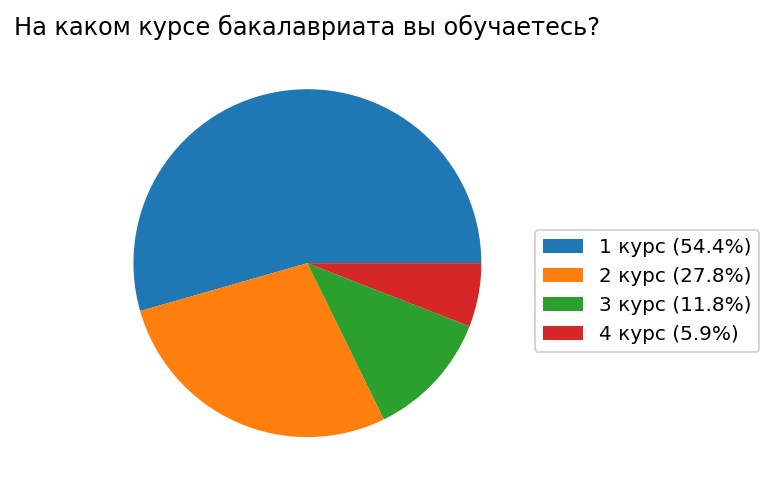

In [37]:
get_pie('year')

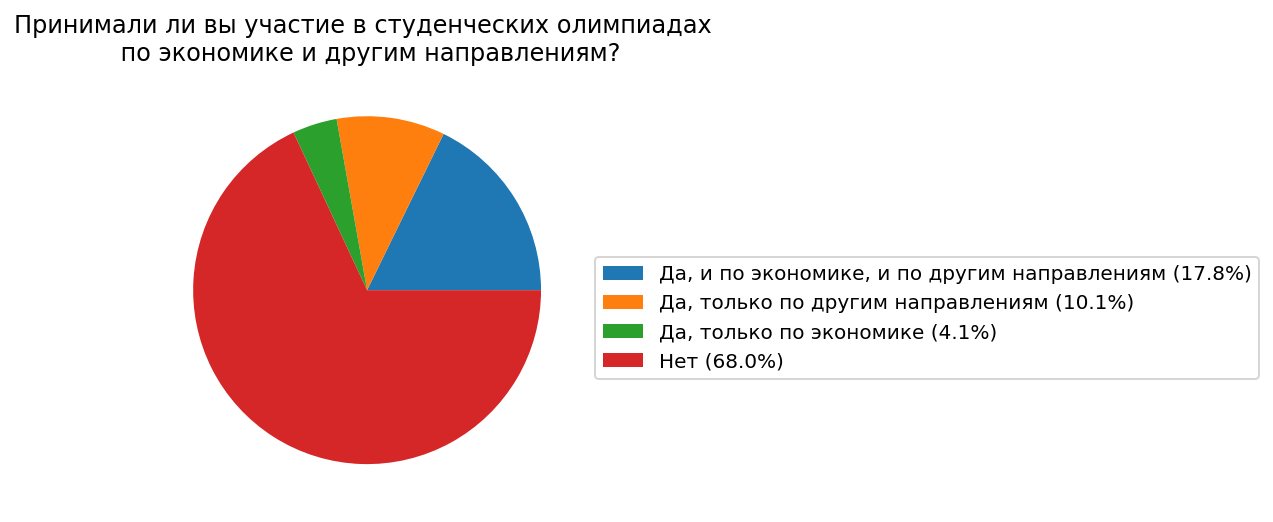

In [38]:
get_pie('if_participated')

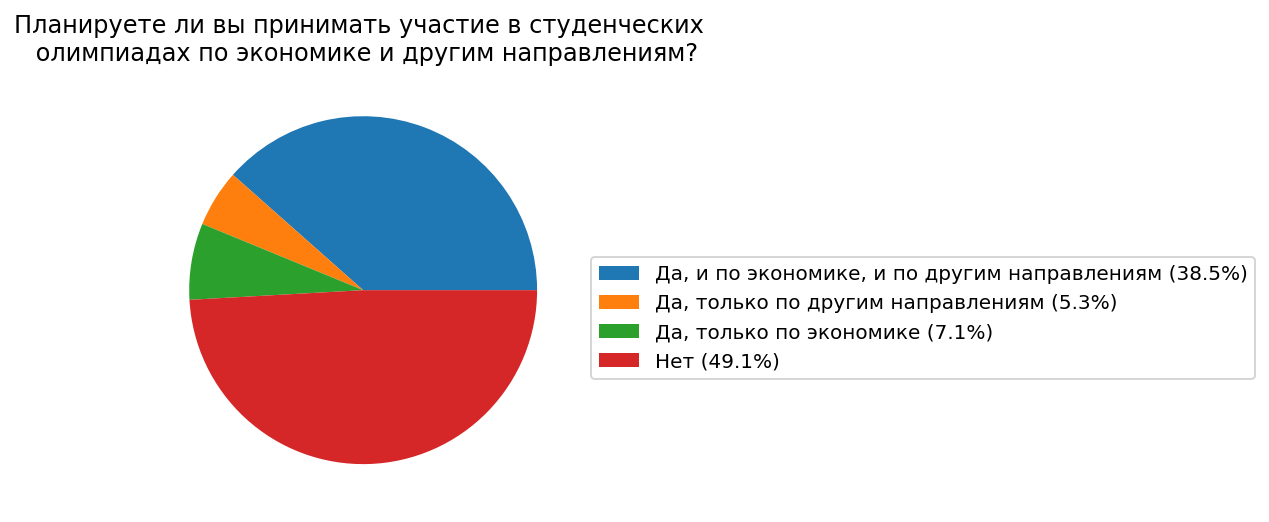

In [39]:
get_pie('if_plan')

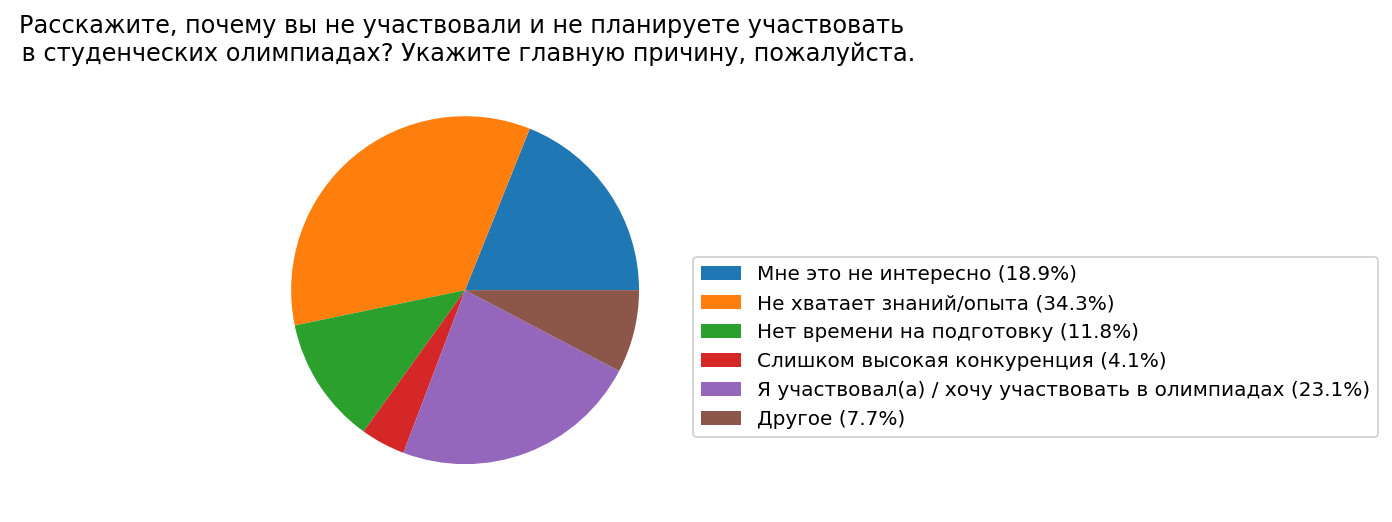

Другое:
Не усаствовала, потому что в школе слишком много акцента делалось на олимпиадах. То есть уважительнее относились к тем, кто что-то занимал на них. Поэтому сформировалось плохое отношение к самим олимпиадам
Не участвовала, потому что опыта маловато, а в будущем планирую
Нет смысла, потому что они ничего не дают, поэтому учиться намного профитнее
Первые 3 причины🥺
Попадалось мало информации про студенческие олимпиады и их проведение, думаю будь ее больше это могло бы и меня заинтересовать 
Хватило олимпиад по горло в школе
Я заканчиваю обучение на 4 курсе


In [40]:
get_pie('why_not_1')

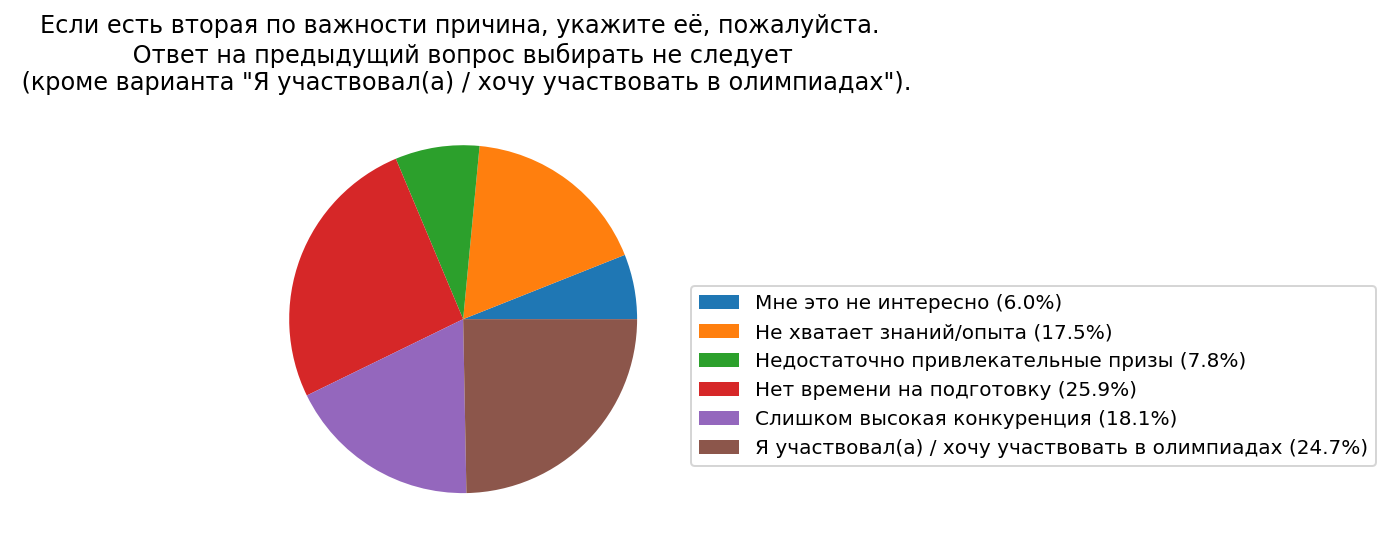

Другое:
-
Очень сложно
Первые три причины)


In [41]:
get_pie('why_not_2')

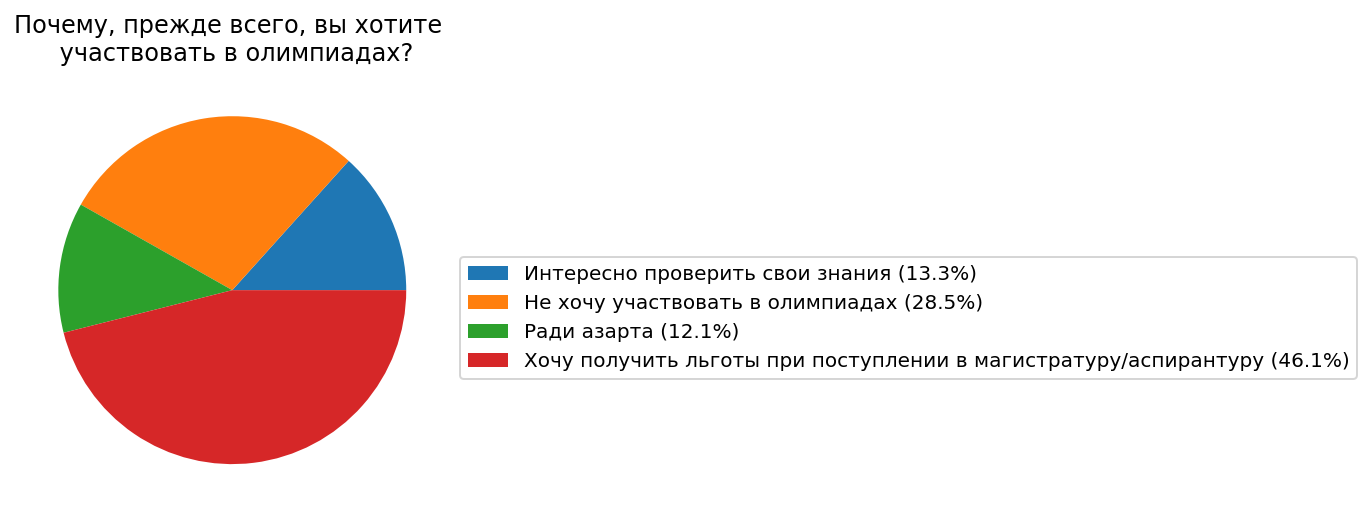

Другое:
Буст для стажировок
Для резюме
Льготы при поиске работы 
будучи олимпиадником в школьные годы, я проникся этой атмосферой и комьюнити, они являются главными причинами участия


In [42]:
get_pie('why_want')

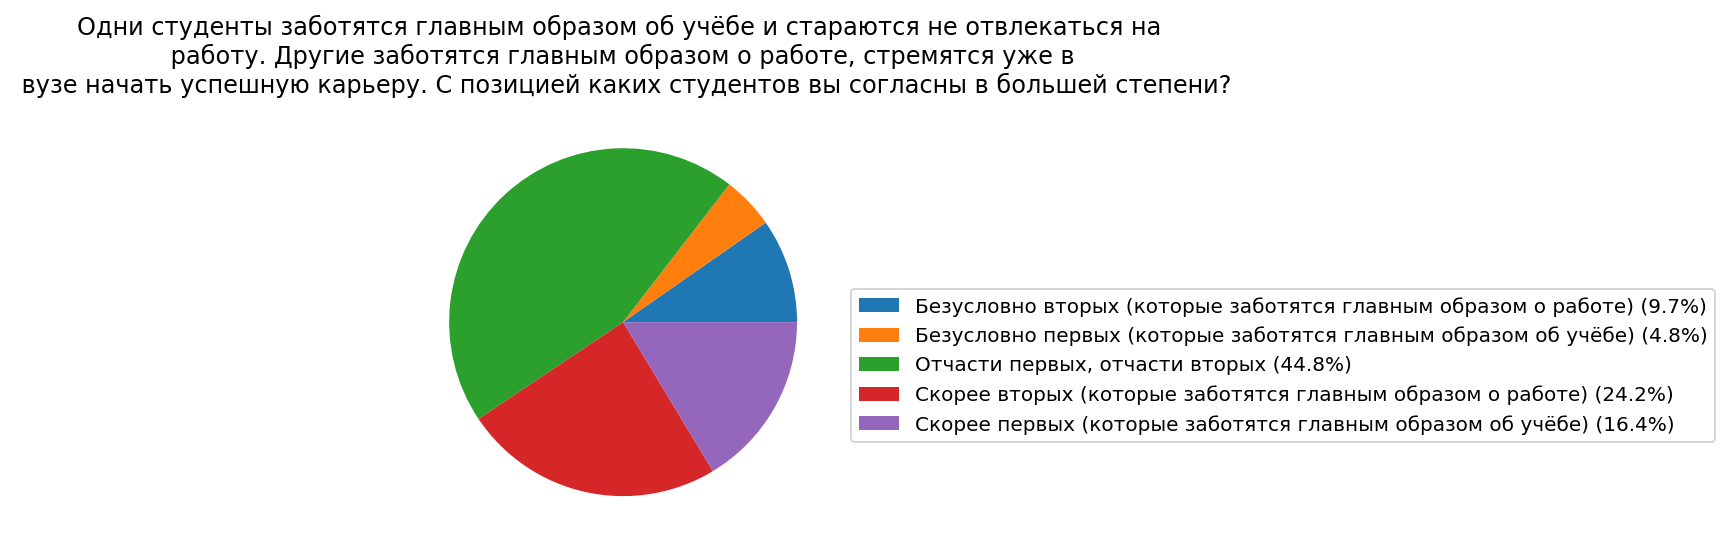

In [43]:
get_pie('study_career')

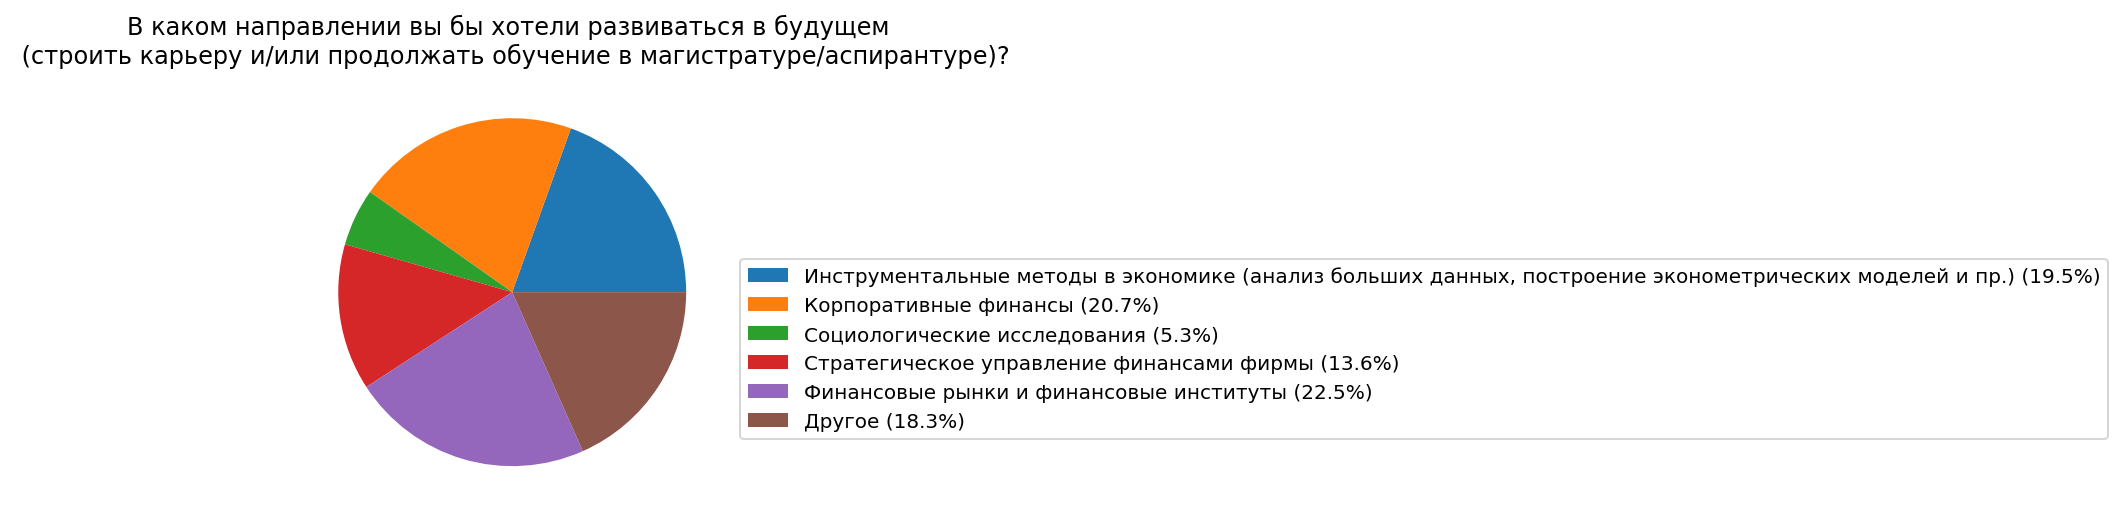

Другое:
DS, analytics
Аналитика 
Аудит
Все и сразу 
Консалтинг 
Маркетинг
Наука о данных
Пока не знаю
Пока не определилась 
Предпринимательство 
Развитие продукта и менеджмент
Стартап
Стохастическое моделирование в экономике и финансах
Управление проектами
бизнес
консалтинг
маркетинг 
не знаю
пока точного ответа дать не могу)


In [44]:
get_pie('future_course')

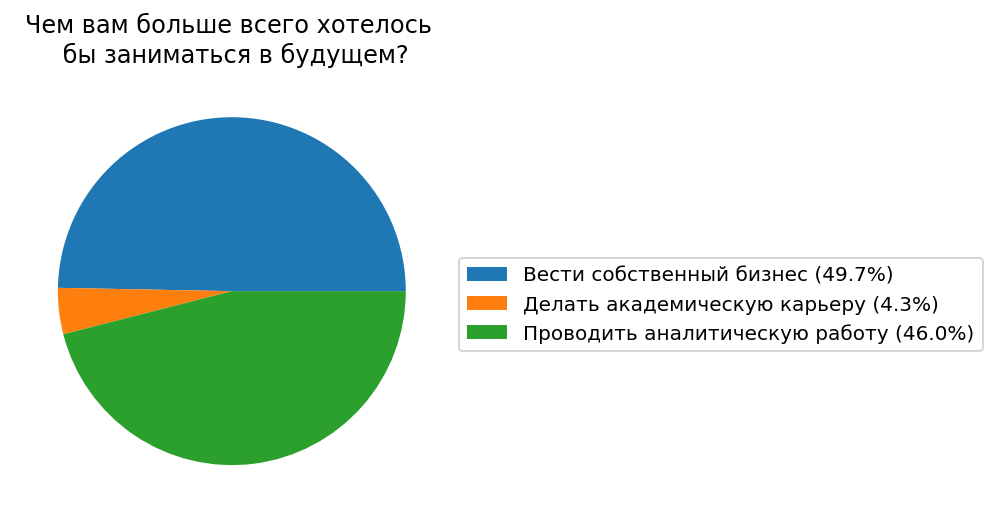

Другое:
Искусством
Принимать участие в руководстве бизнесом
Работа+обучение
Работать в частном секторе
Управление командой/проектами в компании
продвигать чужой бизнес


In [45]:
get_pie('future_area')

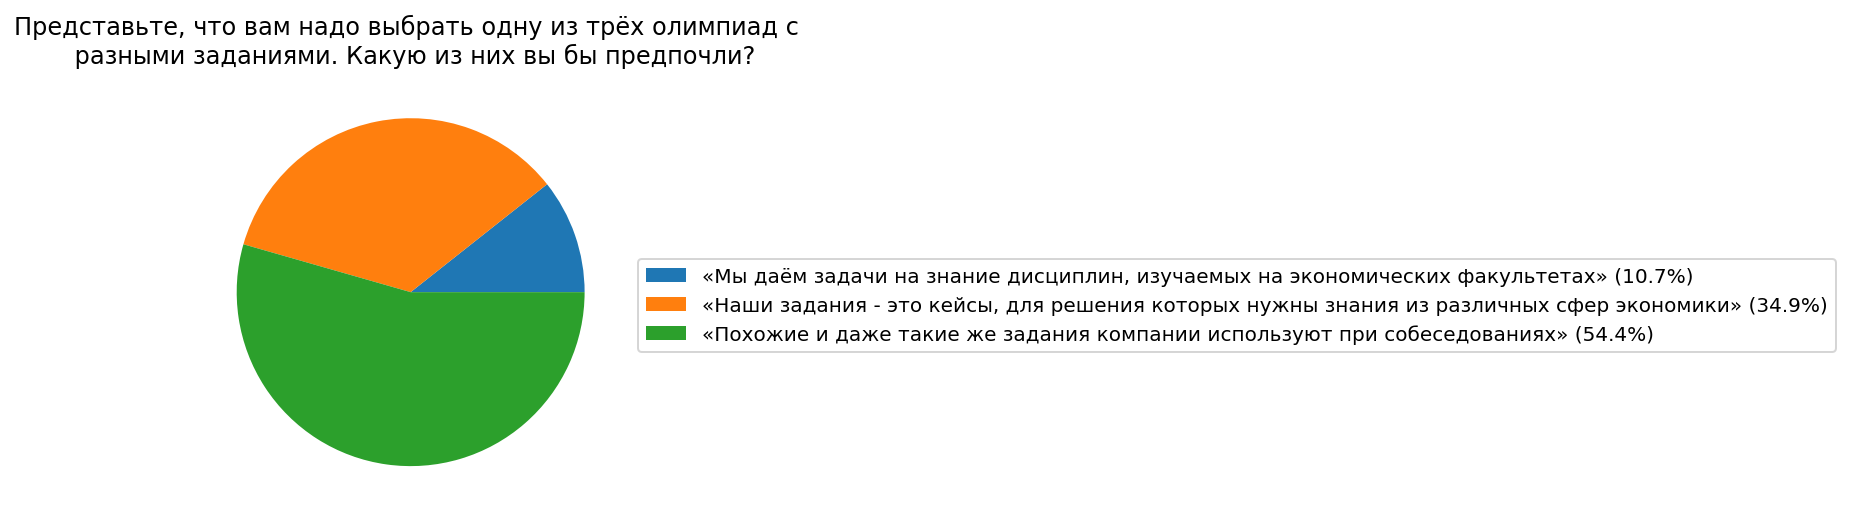

In [46]:
get_pie('tasks_type_1')

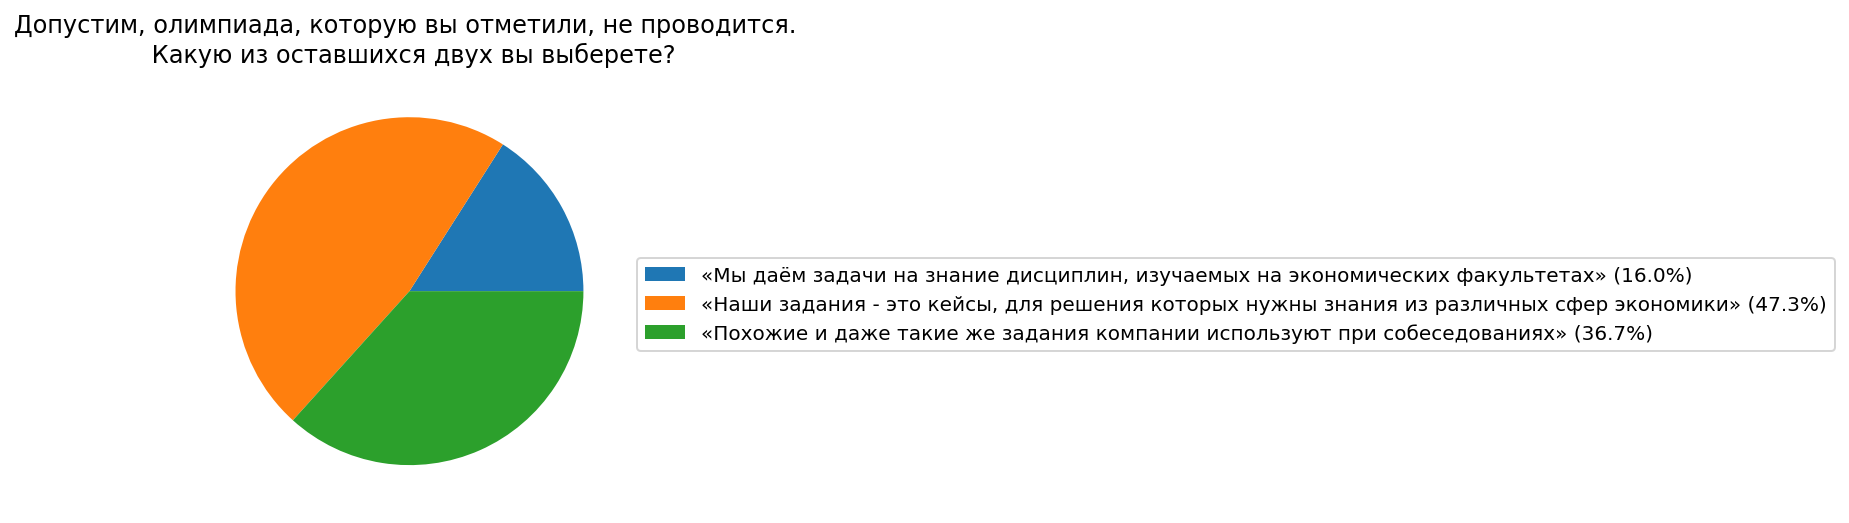

In [47]:
get_pie('tasks_type_2')

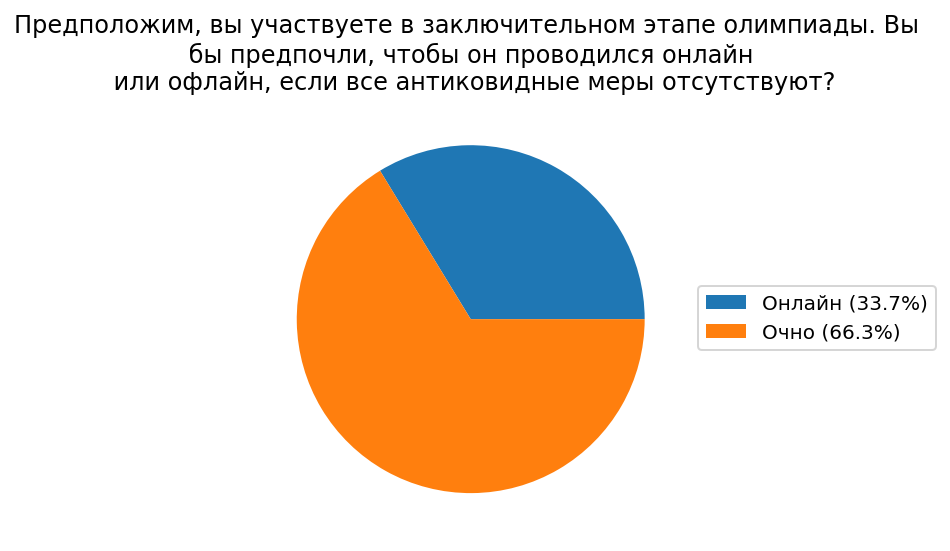

In [48]:
get_pie('online_offline')

In [49]:
fout = open('bonuses.txt', 'w', encoding='utf-8')
print(get_question('bonuses'), '\n', *get_other_q('bonuses'), sep='\n', file=fout)
fout.close()